Data Cleaning

In [ ]:
import pandas as pd
import numpy as np
# load data from Google Drive (must be public)
# note: after last slash, replace with "/export/fromat=xlsx"
excel = pd.ExcelFile('https://docs.google.com/spreadsheets/d/17o2TJJ3_pmrFsFNIdhxyPW3PFO0zyksoSVbrWzrDJoU/export/fromat=xlsx')

# concatenate all sheets and add a column with the sheet names
df = pd.concat([excel.parse(sheet_name).assign(sheet_name=sheet_name) for sheet_name in excel.sheet_names])
df.reset_index(inplace=True)

[1]
int64


In [ ]:
# id
df.index =  range(1, len(df) + 1)
df["id"] = df.index
del df["index"]


In [ ]:

# color

print(df["color"].unique())
df["color"] = df["color"].str.lower() # lower case
df["color"] = df["color"].str.replace(r'^(light|dark)(?!\s)', r'\1 ', regex=True) # ai, adds blank after light/dark
df.loc[df['color'].str.contains('transparent', case=False, na=False), 'transparent'] = 1 # if color contains "transparent", make transparent column 1
df['color'] = df['color'].str.replace('transparent', '', case=False, regex=False).str.strip() # delete transparent text
df['color'] = df['color'].str.replace(r'\bblck\b', 'black', regex=True) # misspelled

# is duplo? column

print(df["is duplo?"].unique())

corrections_duplo = {
    "yes" : 1,
    "no" : 0
}

df["is duplo?"] = df["is duplo?"].replace(corrections_duplo, regex=True)
df['is duplo?'] = df['is duplo?'].astype(bool) # changing data type

# size type column

print(df["size type"].unique())
df["size type"] = df["size type"].str.lower()

# base shape column
print(df["base shape"].unique())
df["base shape"] = df["base shape"].str.lower()

corrections_shape = {
    "trapezium" : "trapezoid" ,
    "round": "circle",
    "wadge": "triangle"
}
df["base shape"] = df["base shape"].replace(corrections_shape)

# base dimensions column
print(df["base dimensions"].unique())
print(df["base dimensions"].value_counts())
df["base dimensions"] = df["base dimensions"].str.replace(' ', '', regex=False) # remove blanks
df["base dimensions"] = df["base dimensions"].str.replace(r'[xX*]','', regex=True) # remove x,X, and *
df["base dimensions"] = df["base dimensions"].apply( lambda x: 'x'.join(sorted(x))) # sort values and join with x (ai)
df["base dimensions"] = df["base dimensions"].replace( "+x2x2x2x4", np.nan)

# number of studs

print(df["number of studs"].unique())
print(df["number of studs"].dtype)

# has slope?

print(df["has slope?"].unique())
corrections_hasslopes = {
    "no" :0,
    "yes":1
}
df["has slope?"]= df["has slope?"].replace(corrections_hasslopes)
print(df["has slope?"].dtype) # object
df["has slope?"]= df["has slope?"].astype(bool)

# slope degree

print(df["slope degree"].unique())
print(df["slope degree"].dtype)

df.loc[(df["has slope?"]) == False, "slope degree"] = 0 # subsetting with loc

# in stock

print(df["in stock"].unique())
print(df["in stock"].dtype)
df["in stock"] = df["in stock"].replace('yes', 1).astype(int)

# sheet_name

print(df["sheet_name"].unique())
df["group number"] = df['sheet_name'].str.extract(r'(\d+)') #Extracts the numeric part from each string (ai)
df["group number"].unique()
del df["sheet_name"]

# transparency

df["transparent"].dtype
df["transparent"].unique()
df["is transparent?"] = df["transparent"].astype("boolean")
del df["transparent"]




['Dark Blue' 'Green' 'Coral' 'Red' 'White' 'Light Green' 'Orange' 'Yellow'
 'Brown' 'Purple' 'Lilac' 'Orchid' 'Dark Grey' 'Light Grey' 'Pink'
 'Dark Green' 'Cream' 'Black' 'Red Brown' 'Neon Yellow' 'Cyan'
 'Denim Blue' 'Ice Blue' 'Capri' 'Shiny Green' 'Olive Green' 'Beige'
 'Bright Pink' 'Transparent' 'lightgreen' 'lightbrown' 'lightpink' 'red'
 'yellow' 'darkblue' 'darkgreen' 'darkpink' 'orange' 'darkpurple'
 'lightpurple' 'white' 'grey' 'mudbrown' 'black' 'turquoise' 'lightblue'
 'neon orange' 'neon dark yellow' 'neon light yellow' 'darkbrown'
 'bright green' 'pink' 'peach' 'blue' 'pear' 'dark green ' 'dark green'
 'sky blue' 'bright yellow' 'navy blue' 'purple' 'maroon' 'cream' 'khaki'
 'neon green' 'neon yellow' 'neon blue' 'coral' 'lime green' 'green'
 'brick red' 'cyan' 'baby blue' 'cafe' 'hot magent' 'Green ' 'Blue' 'Grey'
 'Sky Blue' 'Deep Blue' 'Sky blue' 'Transparent yellow'
 'Transparent orange' 'Blck' 'Transparent sky blue']
[True False 'yes' 'no']
['Brick' 'Plate' 'plate' 

/tmp/ipython-input-1128430194.py:73: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["in stock"] = df["in stock"].replace('yes', 1).astype(int)


In [ ]:
df

,id,color,is duplo?,size type,base shape,base dimensions,number of studs,has slope?,slope degree,in stock,group number,is transparent?
1,1,dark blue,True,brick,rectangle,2x4,8,False,0.0,1,1,<NA>
2,2,green,True,brick,rectangle,2x4,8,False,0.0,1,1,<NA>
3,3,coral,True,brick,square,2x2,4,False,0.0,1,1,<NA>
4,4,red,True,brick,square,2x2,4,False,0.0,1,1,<NA>
5,5,white,True,brick,square,2x2,4,False,0.0,1,1,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...
200,200,orange,False,plate,square,1x1,0,False,0.0,1,5,True
201,201,black,False,plate,trapezoid,2x2,4,False,0.0,1,5,<NA>
202,202,yellow,False,plate,rectangle,1x2,0,False,0.0,1,5,<NA>
203,203,sky blue,False,plate,circle,1x1,0,False,0.0,1,5,True


In [ ]:
from google.colab import files
df.to_excel('03_homework_group4_data.xlsx', index=False)
files.download("03_homework_group4_data.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Data Overview & Dataset Structure & Descriptive Statistics

In [ ]:
# Analysis
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()
df = pd.read_excel('03_homework_group4_data.xlsx')

Saving 03_homework_group4_data.xlsx to 03_homework_group4_data (1).xlsx


In [22]:
print(f"Number of entries is {df.shape[0]}")
print(f"Number of columns is {df.shape[1]}")
print("Format file is xlsx ")
print(f"Column names are {df.columns}")
print(df.info()) # info
print(df.dtypes) # data types
print(df.nunique()) # number of unique values
print(df.describe())  # descriptive stat for numeric values
print(df.describe(include=["object","bool"])) # for objects and booleans






Number of entries is 204
Number of columns is 12
Format file is xlsx 
Column names are Index(['id', 'color', 'is duplo?', 'size type', 'base shape',
       'base dimensions', 'number of studs', 'has slope?', 'slope degree',
       'in stock', 'group number', 'is transparent?'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               204 non-null    int64  
 1   color            203 non-null    object 
 2   is duplo?        204 non-null    bool   
 3   size type        204 non-null    object 
 4   base shape       204 non-null    object 
 5   base dimensions  203 non-null    object 
 6   number of studs  204 non-null    int64  
 7   has slope?       204 non-null    bool   
 8   slope degree     204 non-null    int64  
 9   in stock         204 non-null    int64  
 10  group number     204 non-null    int6

In [46]:
# Duplicates

df_grouped = df.groupby(['color', 'is duplo?', 'size type', "base shape", "base dimensions", "number of studs", "has slope?", "slope degree"], as_index=False)['in stock'].sum()
#exlude transparancy because there are lots of NA's in there.
print(f"There are {df_grouped.shape[0]} unique pieces")
print(df_grouped["in stock"].value_counts())



There are 183 unique pieces
in stock
1    168
2     11
3      4
Name: count, dtype: int64


Exploratory Plots

In [42]:
# Graphs
import matplotlib.pyplot as plt

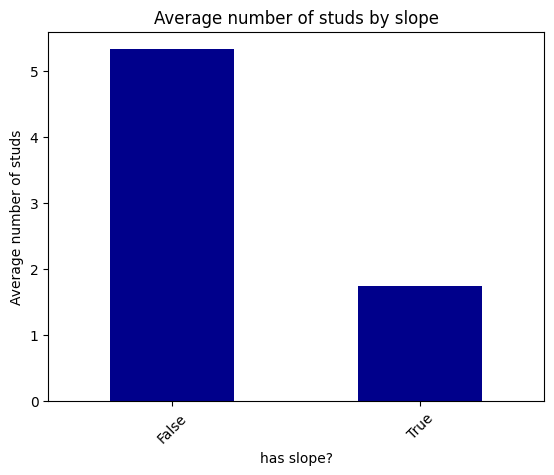

In [55]:
# number of studs, has slope: the ones with slopes has less studs

avg_studs_by_slope = df.groupby("has slope?")["number of studs"].mean()
avg_studs_by_slope.plot(kind="bar",
                        title= "Average number of studs by slope",
                        color="darkblue",
                        rot=45)
plt.ylabel("Average number of studs")

plt.show()

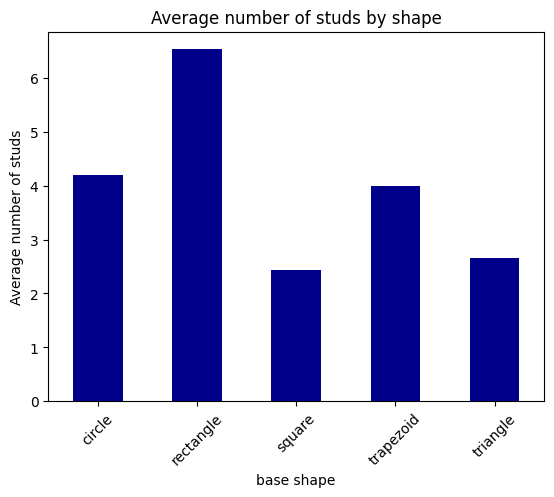

In [54]:
avg_studs_by_shape = df.groupby("base shape")["number of studs"].mean()
avg_studs_by_shape.plot(kind="bar",
                        title= "Average number of studs by shape",
                        color="darkblue",
                        rot=45)
plt.ylabel("Average number of studs")

plt.show()

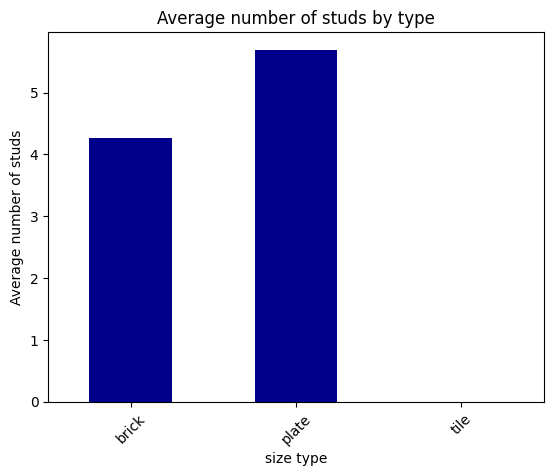

In [56]:
avg_studs_by_type = df.groupby("size type")["number of studs"].mean()
avg_studs_by_type.plot(kind="bar",
                        title= "Average number of studs by type",
                        color="darkblue",
                        rot=45)
plt.ylabel("Average number of studs")

plt.show()

**Data Cleaning Procedure**

During the data preprocessing stage, several inconsistencies and formatting issues were identified and corrected:

  **Color column:** Variations in spelling such as “light blue” and “lightblue” were standardized. Composite color entries like “transparent orange” were simplified to “orange”, and the existing transparency column was set to 1 for those cases. Since most other groups did not include transparency information, this column contains many missing values.

  **Base dimension column:** There were multiple inconsistent formats (e.g., 2x2, 2X2, 2*2). Additionally, 2x4 and 4x2 referred to the same configuration but were recorded differently. To ensure uniformity, all text characters were removed, dimensions were ordered from smaller to larger, and then reformatted using the “x” separator (e.g., 2x4).

  **Slope degree column:** Missing values were filled with 0 for observations where has slope? was False.

  **Boolean variables :** In "is duplo?" and "has slope?" columns , values were recorded as “yes/no”. These were recoded as 1/0.

  **In stock column:** Although this variable should be numeric, some entries were incorrectly stored as Boolean. All were converted to numeric format.

After the cleaning process, the dataset included 204 total items. To identify duplicates, the data were grouped by the variables color, is duplo?, size type, base shape, base dimensions, number of studs, has slope?, and slope degree. The transparency variable was excluded from this grouping due to the large number of missing values. Based on this grouping, the dataset contained 183 unique parts in total.

**Recommendations**

The goal of this exercise was to experience the challenges of manual data entry and understand how inconsistencies can occur even with a predefined structure. In future work, using automated input forms or validation rules could help reduce such errors.

**AI Disclaimer:**

I used AI-generated code for tasks such as standardizing color names, handling transparency values, unifying base dimension formats, and extracting group numbers, as shown below:

    df["color"] = df["color"].str.replace(r'^(light|dark)(?!\s)', r'\1 ', regex=True) # ai, adds blank after light/dark
    df.loc[df['color'].str.contains('transparent', case=False, na=False), 'transparent'] = 1 # if color contains "transparent", make transparent column 1
    df['color'] = df['color'].str.replace('transparent', '', case=False, regex=False).str.strip() # delete transparent text


    df["base dimensions"] = df["base dimensions"].apply( lambda x: 'x'.join(sorted(x)))


    df["group number"] = df['sheet_name'].str.extract(r'(\d+)')